In [1]:
#importing libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import numpy as np


In [2]:
dataset = keras.datasets.mnist
class_names = ['Zero','one','two','three','Four','Five','Six','seven','Eight','nine']
(x_train,y_train),(x_test,y_test) = dataset.load_data()
X_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
X_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


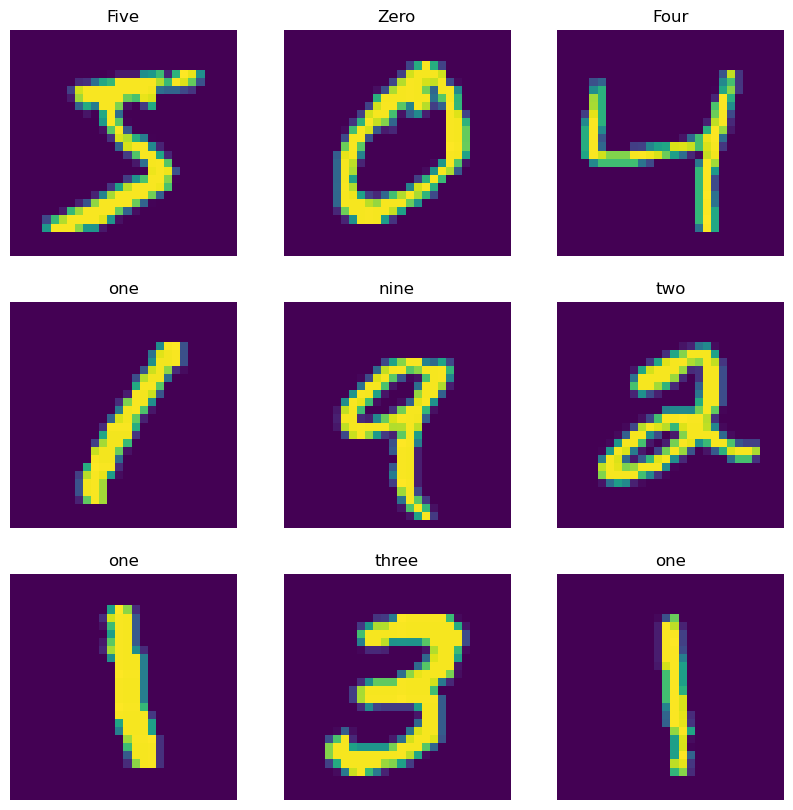

In [3]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")


In [4]:
X_train=X_train/255.0
X_test=X_test/255.0


#Model
model = keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

model.fit(x_train,y_train,epochs=5,callbacks=keras.callbacks.EarlyStopping(patience=2))

#evaluting the model
model.evaluate(x_test,y_test)



/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-18 17:35:08.086466: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-06-18 17:35:08.086483: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-18 17:35:08.086491: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-18 17:35:08.086504: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-18 17:35:08.086513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_facto

In [ ]:
#Prediction
sample_img = X_test[0]
sample_img.shape
plt.imshow(sample_img)

img = np.expand_dims(sample_img,axis=0)
img.shape

pred = model.predict(img)

pred

print(f"Predicted: {class_names[np.argmax(pred)]}\nActual: {class_names[y_test[0]]}")
